In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCACapacity.csv")
MCACapacity

,technology,dst_region,region,agent,sector,type,year,capacity
0,gasboiler,Kenya,Kenya,A1,residential,retrofit,2020,10.0000
1,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,16425.0000
2,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,120818.6500
3,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,87424.8000
4,Light Fuel Oil Power Plant,Kenya,Kenya,A1,power,retrofit,2020,83950.0000
...,...,...,...,...,...,...,...,...
89,Onshore Wind,Kenya,Kenya,A1,power,retrofit,2050,1000.0000
90,Solar PV (Distributed with Storage),Kenya,Kenya,A1,power,retrofit,2050,100.0000
91,Solar PV (Utility),Kenya,Kenya,A1,power,retrofit,2050,100.0000
92,Crude Oil Refinery Option 1,Kenya,Kenya,A1,oil,retrofit,2050,4.7804


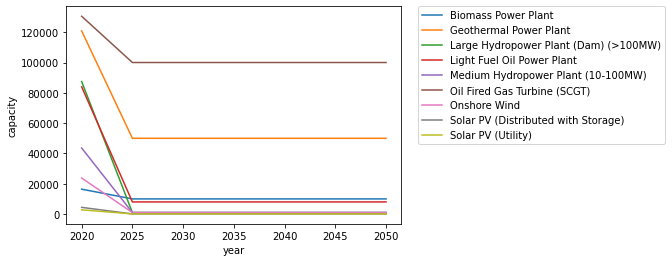

In [7]:
sns.lineplot(data=MCACapacity[MCACapacity.sector=="power"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

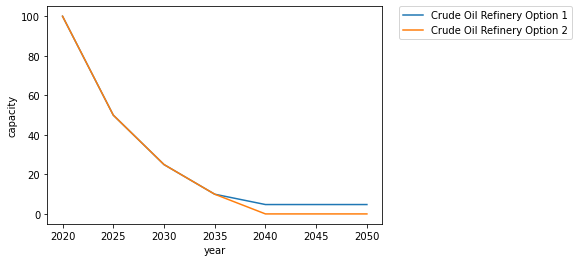

In [8]:
sns.lineplot(data=MCACapacity[MCACapacity.sector=="oil"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)